# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [168]:
# Carregando as bibliotecas 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [169]:
# Carregando o dataframe
df = pd.read_csv('Mod07 - df_dummies Tarefa 01.csv')
df

,Unnamed: 0,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,0,1,1,1
1,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1
2,2,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1
3,3,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,0,1,1,1
4,4,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,1,0,0,1
16646,16646,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,1,0,0,1
16647,16647,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,1,1,1,1
16648,16648,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,1,1,1,1


In [170]:
# Verificando as colunas
df.columns

Index(['Unnamed: 0', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y'],
      dtype='object')

In [171]:
# Verificando o tipo das colunas
df.dtypes

Unnamed: 0                 int64
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int64
sexo_M                     int64
posse_de_veiculo_Y         int64
posse_de_imovel_Y          int64
dtype: object

In [172]:
#Eliminando colunas em formato string (object)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('tipo_renda',axis=1)
df = df.drop('educacao',axis=1)
df = df.drop('estado_civil',axis=1)
df = df.drop('tipo_residencia',axis=1)

In [173]:
# Verificando as colunas formatadas
df.dtypes

qtd_filhos                 int64
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int64
sexo_M                     int64
posse_de_veiculo_Y         int64
posse_de_imovel_Y          int64
dtype: object

In [174]:
# Verificando/eliminando se há dados em branco ou duplicados nas colunas
df.drop_duplicates()
df.isna().sum()

qtd_filhos               0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
sexo_M                   0
posse_de_veiculo_Y       0
posse_de_imovel_Y        0
dtype: int64

In [175]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,0,1
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,1,1
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,1,0,0,1
16646,0,43.389041,7.380822,1,1,1,0,2.0,1,0,0,1
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,1,1
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,1,1


In [176]:
# Definindo o target
y = df['mau']                      

In [177]:
#target
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [178]:
# Definindo as variáveis explicativas
X = df.drop('mau', axis=1)

In [179]:
#variáveis explicativas
X

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,58.832877,3.106849,1,0,0,0,2.0,1,1,1
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,1
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,1
3,0,46.224658,2.106849,1,1,1,1,2.0,1,1,1
4,0,29.230137,3.021918,1,0,0,0,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,0,0,1
16646,0,43.389041,7.380822,1,1,1,0,2.0,0,0,1
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,1
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,1


In [180]:
# Definindo a proporção de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [181]:
# Definindo a arvore de decisão
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

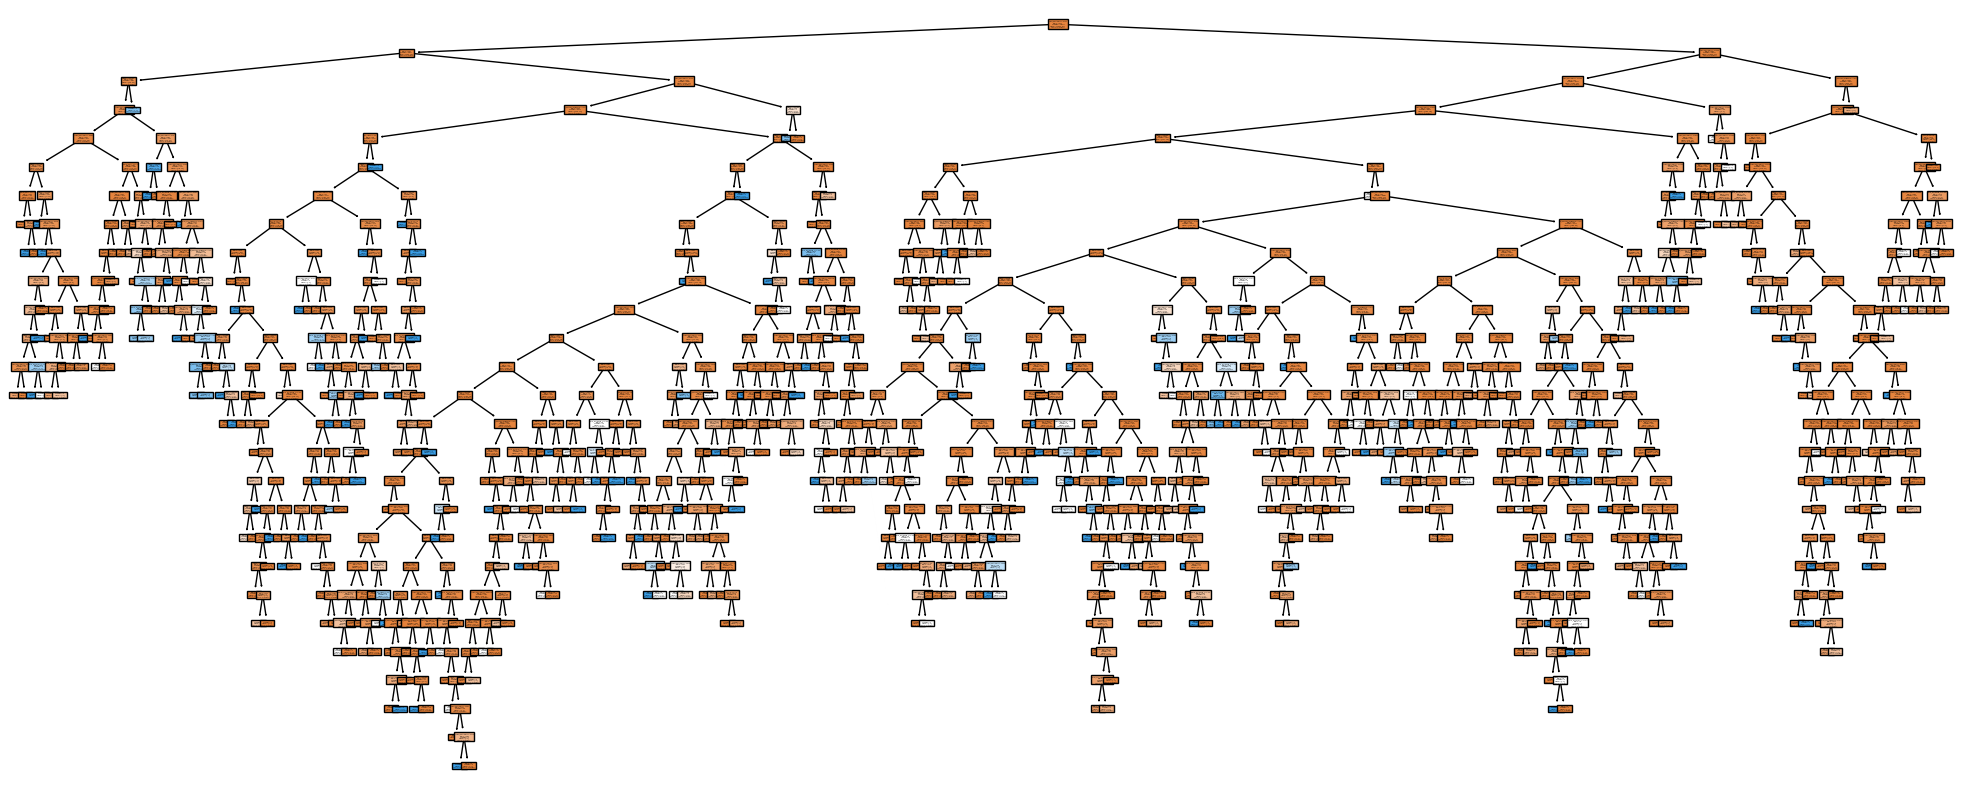

In [182]:
# Visualizando a arvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns.tolist());
plt.show()

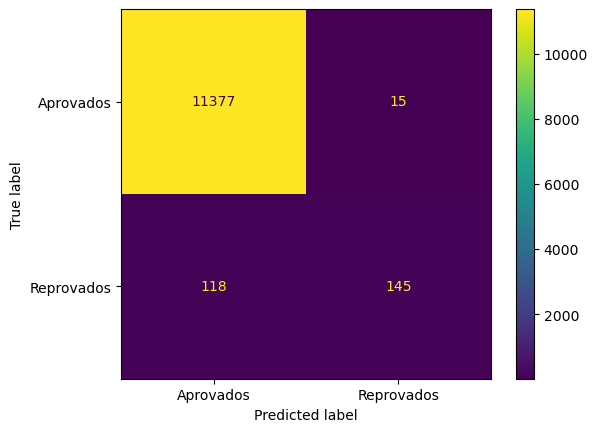

In [183]:
#Matriz confusão treino
predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [184]:
#acurácia da base de treino
y_chapeu_treino = clf.predict(X_train)
accuracy_score(y_train, y_chapeu_treino)

0.9885885885885886

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

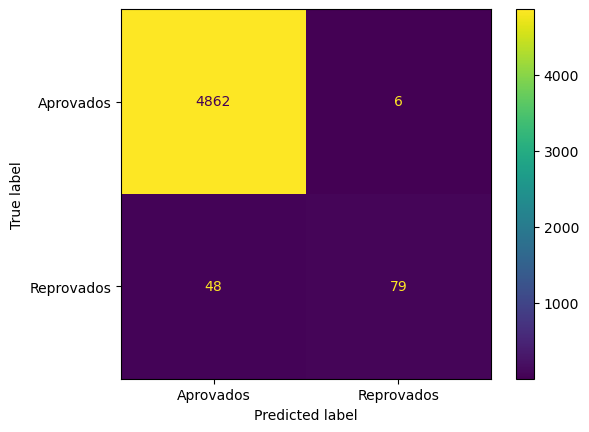

In [185]:
#Matriz confusão teste
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [186]:
#acurácia da base de teste
y_chapeu_teste = clf.predict(X_test)
accuracy_score(y_test, y_chapeu_teste)

0.9891891891891892

## Comparação
Acurácia base de treino = 0.9885885885885886
Acurácia base de teste = 0.9891891891891892
Portanto, a diferença entre a acurácia de treino e a acurácia de teste é aproximadamente 0.0006.

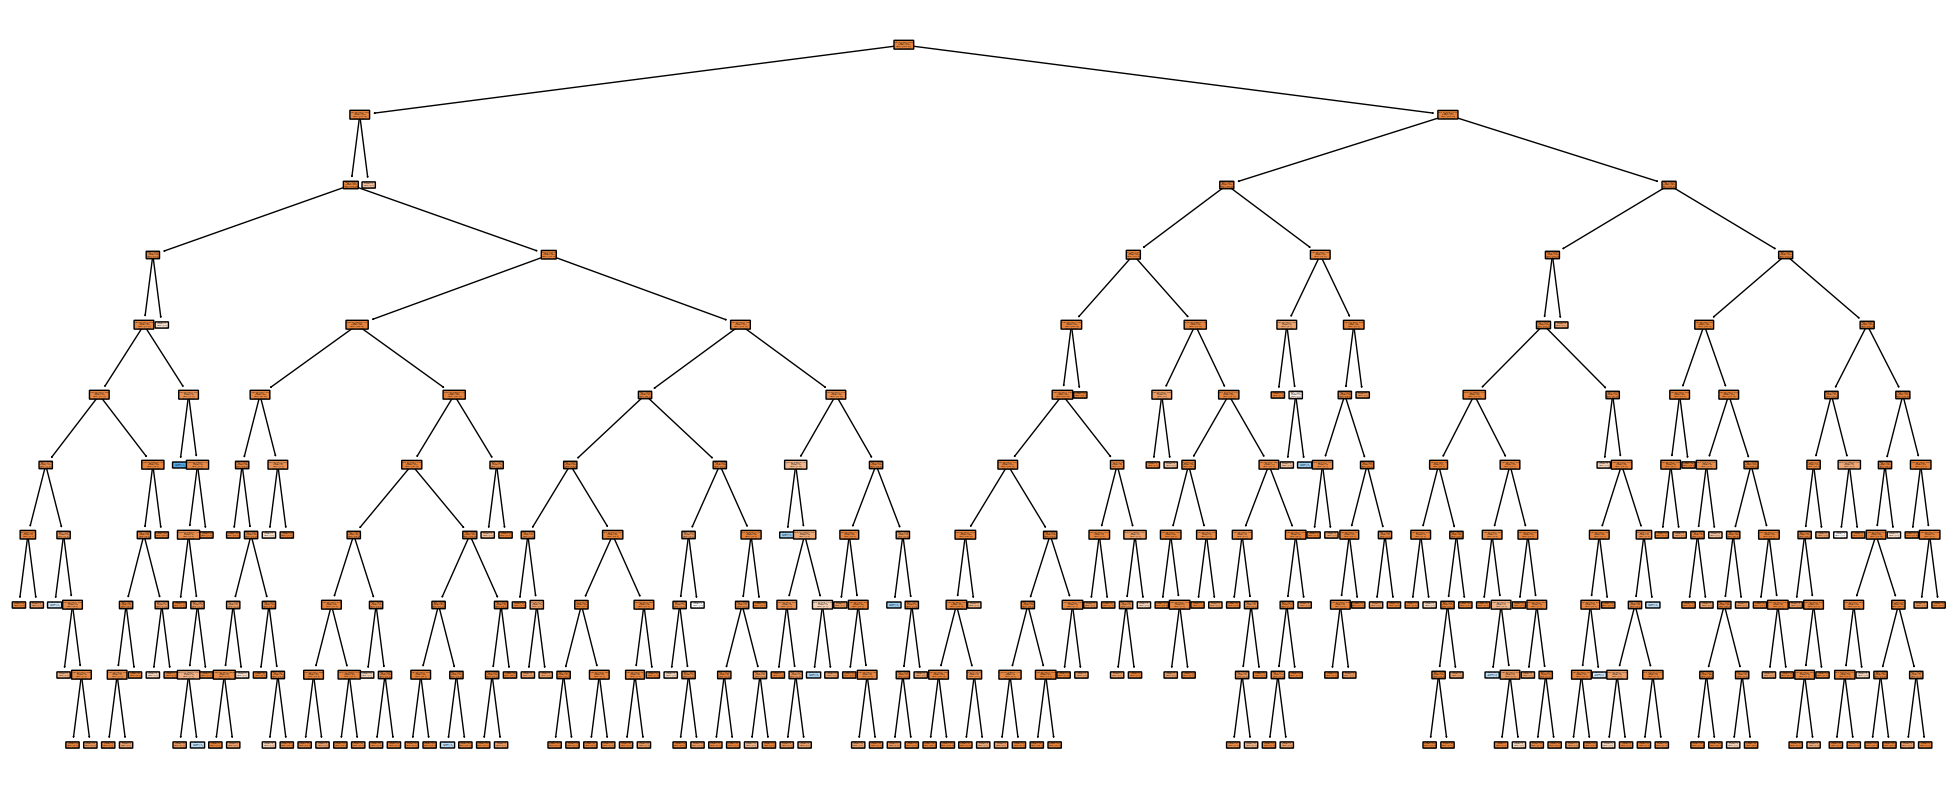

In [187]:
#Matriz de classificação da árvore de decisão
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
plt.figure(figsize=(25,10))
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns.tolist());
plt.show()

In [188]:
# Calculando a proporção de aprovados 
proporcao_aprovados = (predict == 0).sum() / len(predict)*100
proporcao_aprovados

99.42513942513943

In [189]:
# Calculando a proporção de reprovados 
proporcao_reprovados = (predict == 1).sum() / len(predict)*100
proporcao_reprovados

0.5748605748605748

In [190]:
#Mostrando a relação antiga de maus pagadores bons
df['mau'].value_counts()

mau
0    16260
1      390
Name: count, dtype: int64

In [191]:
# Alterando todos da coluna mau para bons pagadores
df['mau'] = df['mau'].replace(1, 0)
df['mau'].value_counts()

mau
0    16650
Name: count, dtype: int64

In [192]:
# Definindo o target
y = df['mau']
# Definindo as variáveis explicativas
X = df.drop('mau', axis=1)

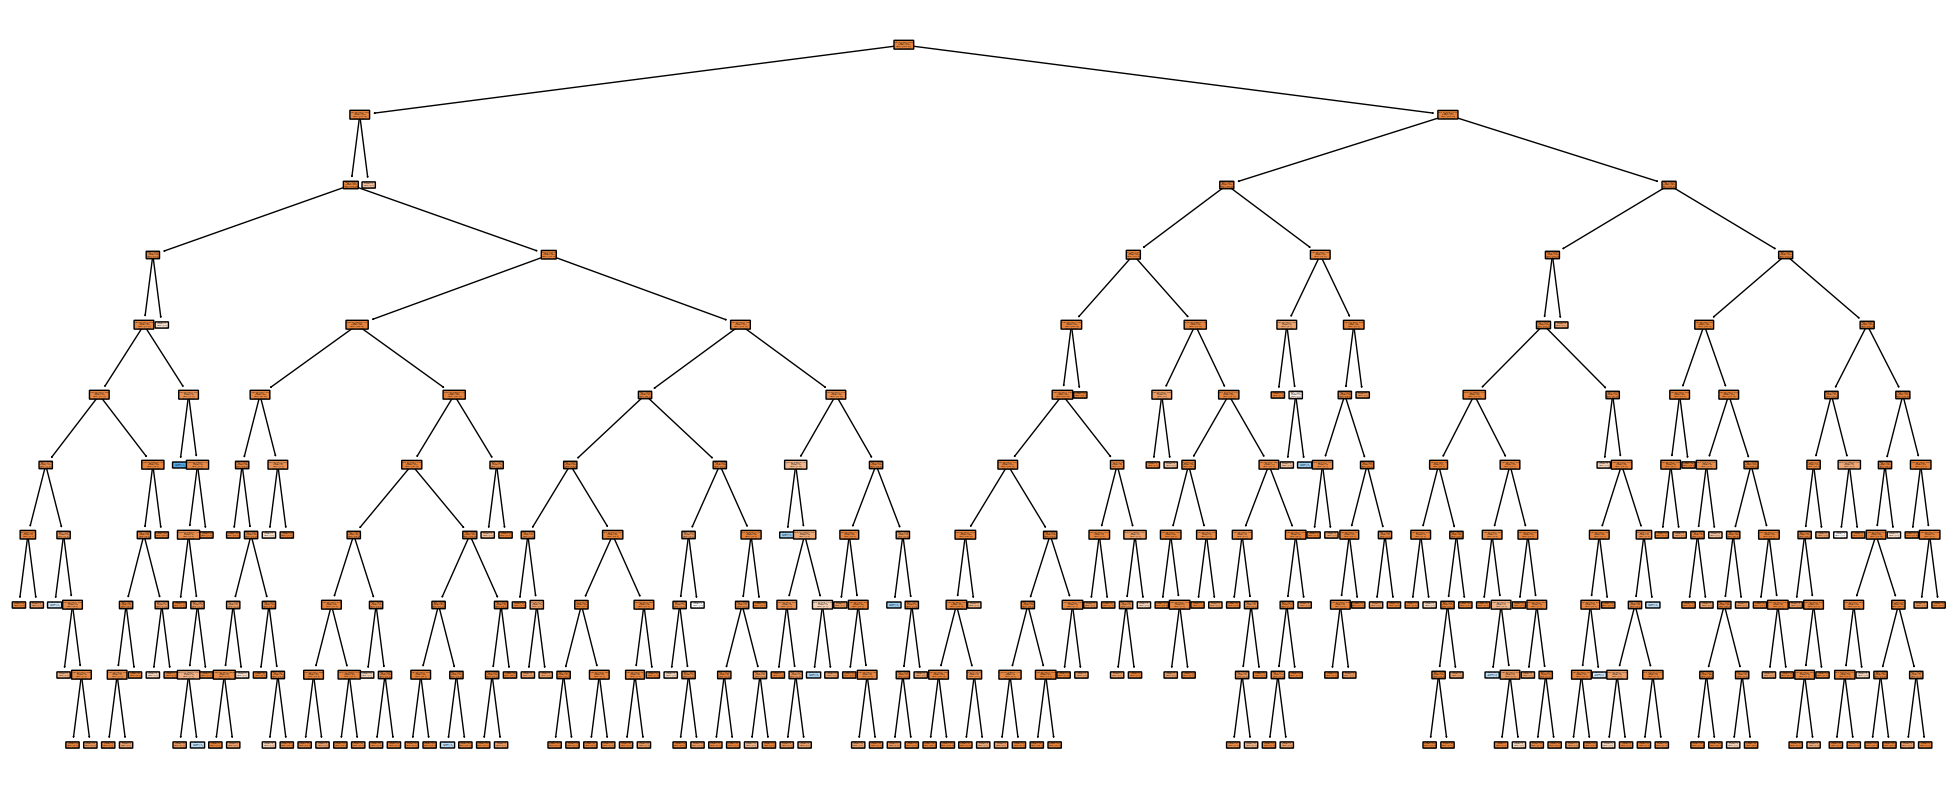

In [193]:
#Matriz de classificação da árvore de decisão
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
plt.figure(figsize=(25,10))
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns.tolist());
plt.show()

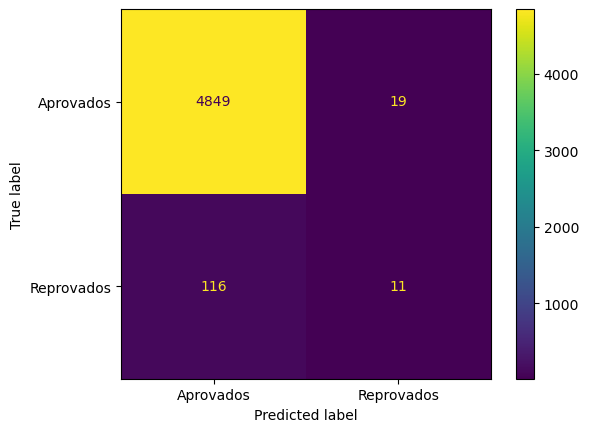

In [194]:
#Matriz confusão teste
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [195]:
#acurácia da base de teste
y_chapeu_teste = clf.predict(X_train)
accuracy_score(y_train, y_chapeu_teste)

0.9790647790647791

In [196]:
# Calculando a proporção de aprovados e reprovados na base de teste
proporcao_aprovados = (predict == 0).sum() / len(predict)*100
proporcao_aprovados

99.42513942513943

In [197]:
proporcao_reprovados = (predict == 1).sum() / len(predict)*100
proporcao_reprovados

0.5748605748605748